# This is work in progress

As per wikipedia, Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time one of the deadliest of a single ship[a] and the deadliest peacetime sinking of a superliner or cruise ship to date.

https://en.wikipedia.org/wiki/Titanic

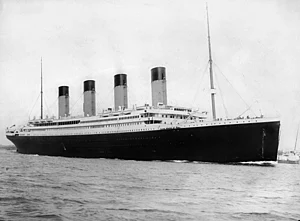

**Our main goal is who can survive and who can not?!**

Please like or comment if you like my work :)

# Import libriaries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

# Initial inspection of dataset

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

print('*'*30)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 no

# Missing Values Corrections
We will try to fill missing values by mean/median/mode. But note that it's also not 100% accurate. You can also use models like Decision Trees and Random Forest to handle missing values

In [5]:
# Lets find columns with null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

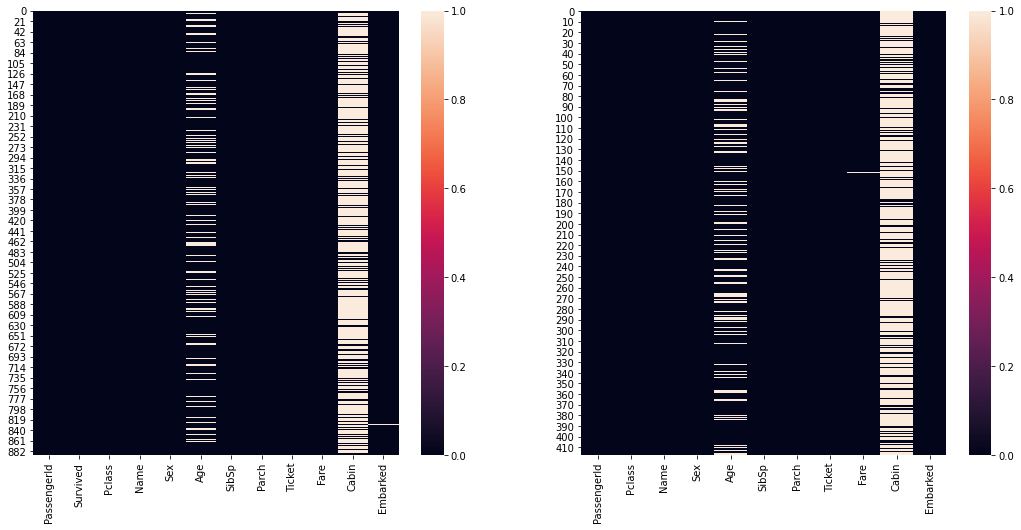

In [6]:
# Check missing value from dataset
plt.figure(figsize=(18,18))
plt.subplot(221)
sns.heatmap(data=train.isnull())
plt.subplot(222)
sns.heatmap(data=test.isnull())

Cabin has 687 missing values which is 80% of data so we should drop cabin.

In [7]:
# Lets drop Cabin column because it have alot of missing value that will effect accuracy of model

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [8]:
# Replace missing Age with mean value of Age column. Its best way to correct the dataset when percentage of missing value of are less

train['Age'].fillna(train.Age.mean(), inplace=True)
test['Age'].fillna(test.Age.mean(), inplace=True)

train['Fare'].fillna(train.Fare.mean(), inplace=True)
test['Fare'].fillna(test.Fare.mean(), inplace=True)

<AxesSubplot:>

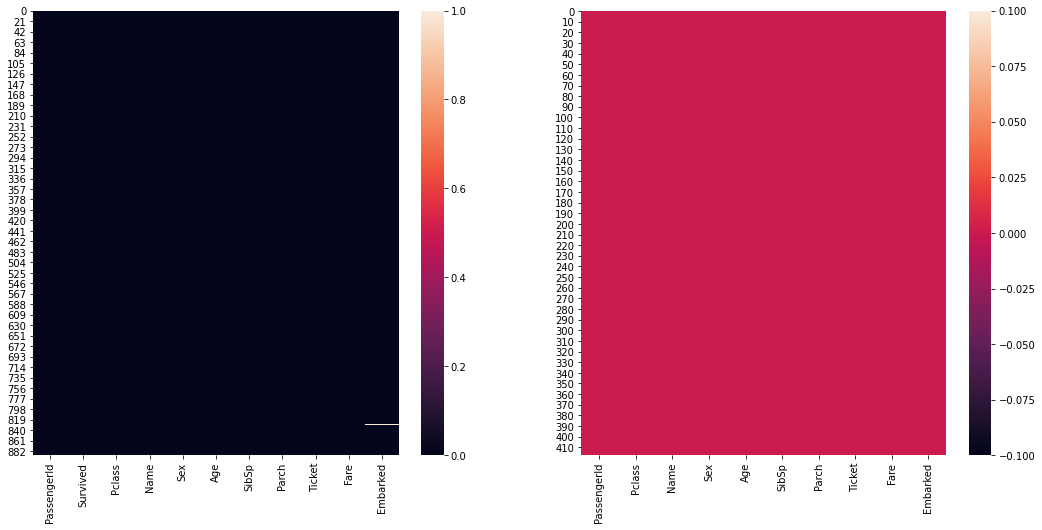

In [9]:
# lets see if there are any more columns with missing values 

plt.figure(figsize=(18,18))
plt.subplot(221)
sns.heatmap(data=train.isnull())
plt.subplot(222)
sns.heatmap(data=test.isnull())

Now both datasets looks clean without missing values. We can proceed further cleaning and modeling process

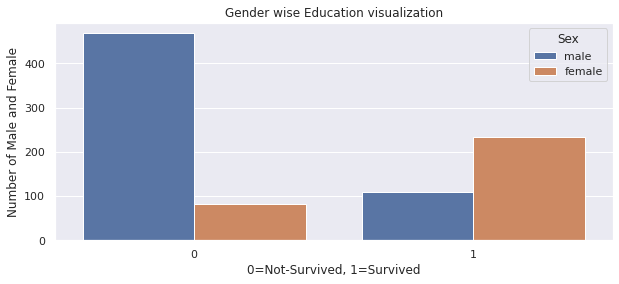

In [10]:
# Now lets check howmany man/female can survived/not-survived using count plot

plt.figure(figsize=(10,4))
sns.set_style('whitegrid')
sns.set(font_scale=1)

sns.countplot(x='Survived', data=train,hue="Sex")
plt.xlabel('0=Not-Survived, 1=Survived')
plt.ylabel('Number of Male and Female')
plt.title('Gender wise Education visualization')
plt.show()

Number of death of man is very high comparing to females. More than 400 male passenger could not survived where as around 90 female could not survived

# Visualizations

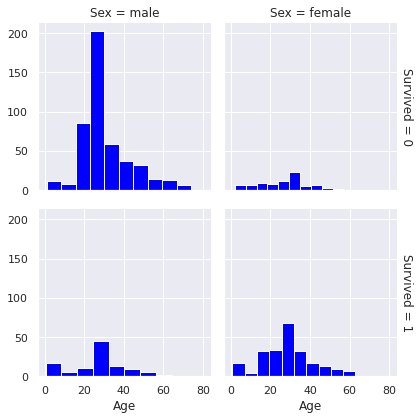

In [11]:
# The Age is measured on very different scaling. So we need to do feature scaling before we start predictions

plot = sns.FacetGrid(train, col="Sex", margin_titles=True, row="Survived")
plot.map(plt.hist, "Age",color="blue");

We can see maximum people between 25-30 year could not survived. That's also because of titanic has more young people

<AxesSubplot:title={'center':'Class wise Age Distribution'}, xlabel='Age', ylabel='Density'>

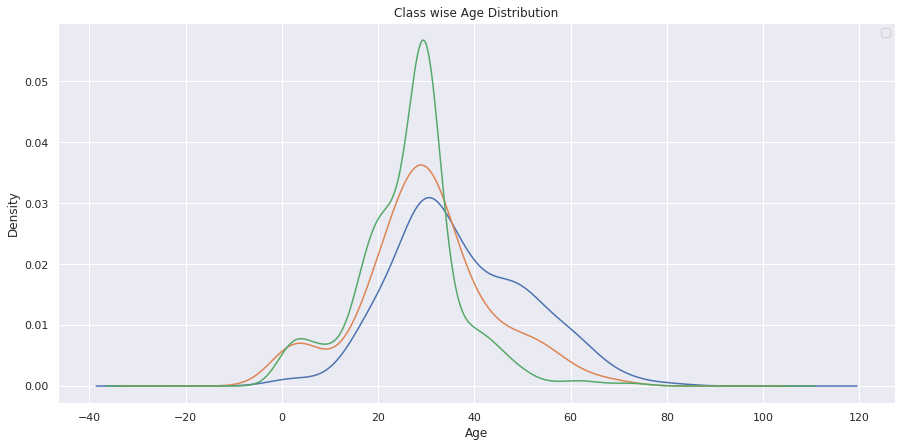

In [12]:
#Let's see Age distribution by classes
plt.figure(figsize=(15,7))
plt.xlabel("Age")    
plt.title("Class wise Age Distribution")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

train.Age[train['Pclass'] == 1].plot(kind="kde")
train.Age[train['Pclass'] == 2].plot(kind="kde")
train.Age[train['Pclass'] == 3].plot(kind="kde")


In [13]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


# Feature Engineering (Convert Categorical variables into Numerical ones)

In [14]:
# We can define no of family members as new feature

train['Family_members'] = train['SibSp'] + train['Parch'] 
test['Family_members'] = test['SibSp'] + test['Parch'] 

In [15]:
# We can also add title as new feature that will help to increase accuracy

train['Title'] = train['Name'].map(lambda name: (name.split(',')[1].split('.')[0].strip()))
test['Title'] = test['Name'].map(lambda name: (name.split(',')[1].split('.')[0].strip()))

<AxesSubplot:xlabel='Title', ylabel='count'>

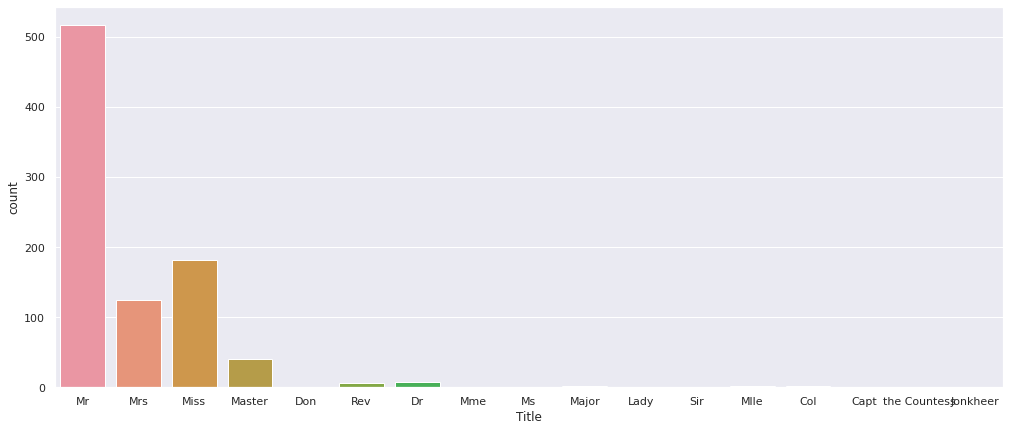

In [16]:
plt.figure(figsize=(17,7))
sns.countplot(x='Title', data=train)

In [17]:
# Dropping PassengerId and Ticket column

#train.drop(['PassengerId','Ticket', 'Name'], axis = 1, inplace = True)
#test.drop(['Ticket', 'Name'], axis = 1, inplace = True)

In [18]:
LabelEnco=LabelEncoder()

columnNames = ['Embarked','Sex', 'Title']
for col in columnNames:
    train[col] = LabelEnco.fit_transform(train[col])
    test[col] = LabelEnco.fit_transform(test[col])

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_members,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,1,11
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,1,12
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,0,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,1,12
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,0,11


In [19]:

train['Pclass_3'] = train['Pclass'].map(lambda x: (x == 3))
train['Pclass_2'] = train['Pclass'].map(lambda x: (x == 2))
train['Pclass_1'] = train['Pclass'].map(lambda x: (x == 1))

test['Pclass_3'] = test['Pclass'].map(lambda x: (x == 3))
test['Pclass_2'] = test['Pclass'].map(lambda x: (x == 2))
test['Pclass_1'] = test['Pclass'].map(lambda x: (x == 1))

In [20]:
train.Sex.value_counts()
train['is_male'] = train['Sex'].map(lambda x: (x == 1))
train['isfemale'] = train['Sex'].map(lambda x: (x == 0))

test['is_male'] = test['Sex'].map(lambda x: (x == 1))
test['isfemale'] = test['Sex'].map(lambda x: (x == 0))

In [21]:
# Prepare train and test data for modeling

X_train = train.drop(['PassengerId','Ticket', 'Name', 'Survived', 'Pclass', 'Sex'], axis=1)
Y_train = train['Survived']
X_test = test.drop(['Ticket', 'Name', 'PassengerId', 'Pclass', 'Sex'], axis=1)

print("shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of x_test",X_test.shape)

shape of X_train (891, 12)
Shape of Y_train (891,)
Shape of x_test (418, 12)


In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_members,Title,Pclass_3,Pclass_2,Pclass_1,is_male,isfemale
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,1,11,True,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,1,12,False,False,True,False,True
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,0,8,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,1,12,False,False,True,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,0,11,True,False,False,True,False


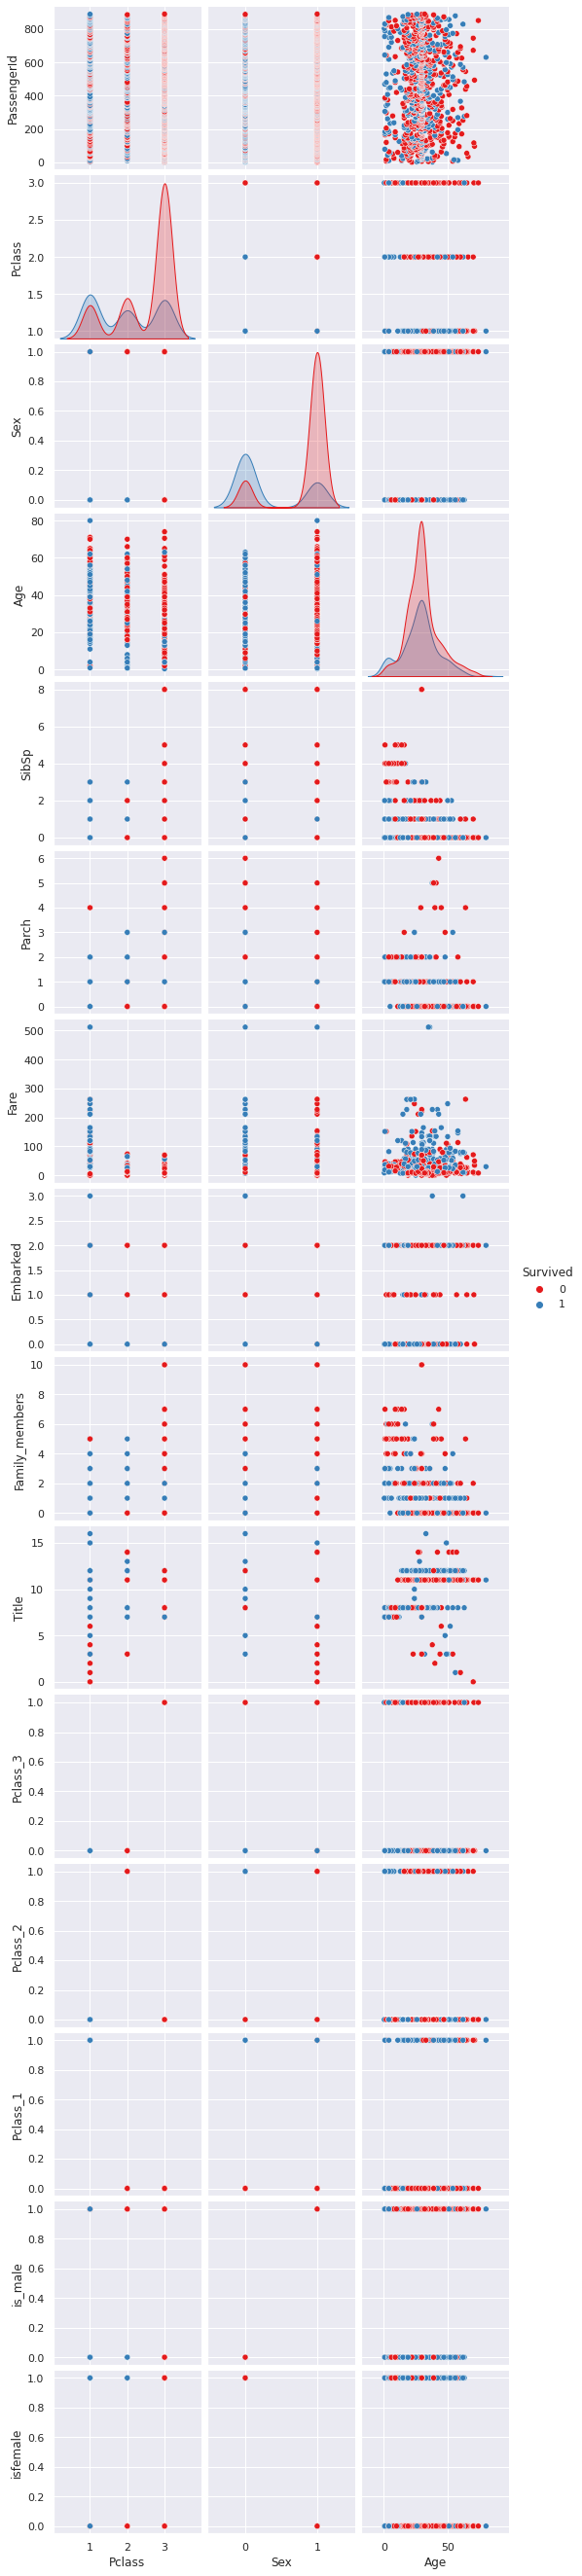

In [23]:
# We shall now plot the numberical variables to look at the distribution
numerical = ['Pclass','Sex','Age']
sns.pairplot(data=train, x_vars=numerical, hue='Survived', palette='Set1')

# LogisticRegression
In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

In [24]:
# Import Libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, mean_absolute_error, mean_squared_error,precision_recall_curve

In [25]:
# Create function to generate headmap of confusion matrix, we are defining the function so that we can resuse it in various model evalution

def show_matrix(x, y):
    matrix = confusion_matrix(x, y)
    sns.heatmap(matrix, annot = True,fmt = 'g')
    plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression

logisticModel = LogisticRegression()
logisticModel.fit(X_train, Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

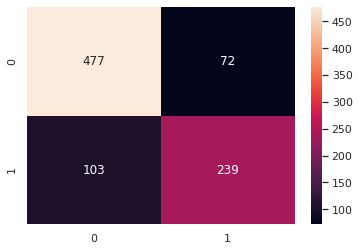

In [27]:
logiPred = logisticModel.predict(X_train)

# Plotting the confusion matrix in heatmap
show_matrix(Y_train, logiPred)

In [28]:
# Check prediction score of Logistic model
precision_score(Y_train, logiPred)*100

76.84887459807074

In [29]:
logiAcScore = accuracy_score(Y_train, logiPred)*100
logiMse = mean_squared_error(Y_train, logiPred)*100

# We will use this variables further in model comparison

(0.0, 1.0)

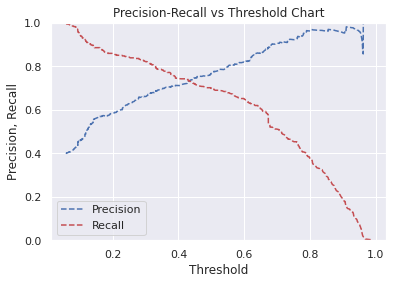

In [30]:
logipp = logisticModel.predict_proba(X_train)

precision, recall, thresholds = precision_recall_curve(Y_train, logipp[:,1])

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])


# KNeighbors Classifier
In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric classification method first developed by Evelyn Fix and Joseph Hodges in 1951,[1] and later expanded by Thomas Cover.[2] It is used for classification and regression. In both cases, the input consists of the k closest training examples in data set.

In [31]:
# Import model
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knnModel = KNeighborsClassifier(n_neighbors=3, algorithm='auto', leaf_size=35)
knnModel.fit(X_train, Y_train)

KNeighborsClassifier(leaf_size=35, n_neighbors=3)

In [33]:
# Prdict of KNN model
knnPrediction = knnModel.predict(X_train)

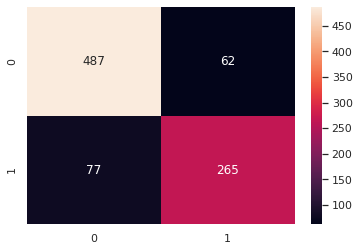

In [34]:
# Plotting the confusion matrix in heatmap
show_matrix(Y_train, knnPrediction)

Here out of 891 total predictions, KNN did 139 wrong predictions

In [35]:
np.round(precision_score(Y_train, knnPrediction)*100, 3)

81.04

(0.0, 1.0)

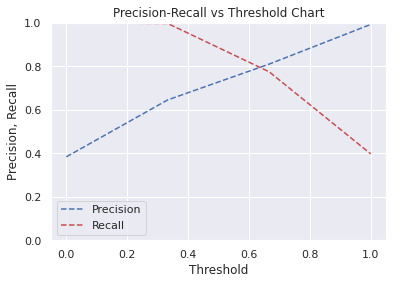

In [36]:
knnpp = knnModel.predict_proba(X_train)

precision, recall, thresholds = precision_recall_curve(Y_train, knnpp[:,1])

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])


In [37]:
knnAcScore = accuracy_score(Y_train, knnPrediction)*100
knnMse = mean_squared_error(Y_train, knnPrediction)*100

# DecisionTree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

dtcModel = DecisionTreeClassifier(max_depth=8)
dtcModel.fit(X_train, Y_train)
DTCPreds = dtcModel.predict(X_train)

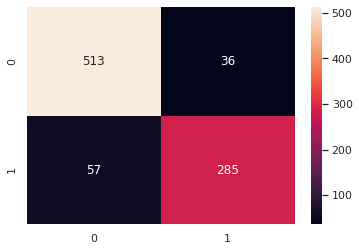

In [39]:
# Plotting the confusion matrix in heatmap
show_matrix(Y_train, DTCPreds)

dtcAcScore = accuracy_score(Y_train, DTCPreds)*100
dtcMse = mean_squared_error(Y_train, DTCPreds)*100

In [40]:
np.round(precision_score(Y_train, DTCPreds)*100, 3)

88.785

(0.0, 1.0)

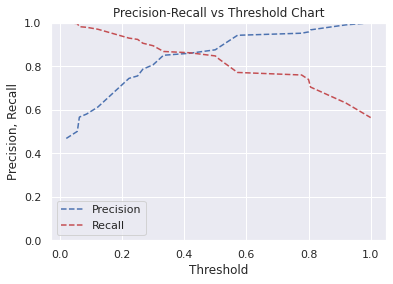

In [41]:
DTCpp = dtcModel.predict_proba(X_train)

precision, recall, thresholds = precision_recall_curve(Y_train, DTCpp[:,1])

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])


# RandomForestClassifier

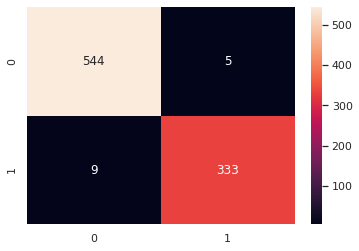

In [42]:
from sklearn.ensemble import RandomForestClassifier
RMModel = RandomForestClassifier(max_features='sqrt', random_state=5)
# max_features='sqrt', random_state=5
RMModel.fit(X_train, Y_train)

RMPreds = RMModel.predict(X_train)

# Plotting the confusion matrix in heatmap
show_matrix(Y_train, RMPreds)

(0.0, 1.0)

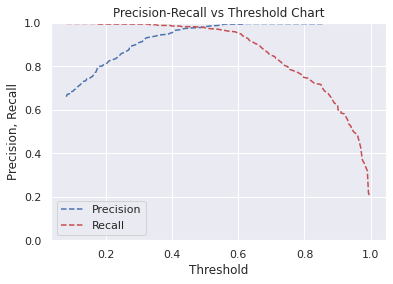

In [43]:
rmpp = RMModel.predict_proba(X_train)

precision, recall, thresholds = precision_recall_curve(Y_train, rmpp[:,1])

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])


In [44]:
rmAcScore = accuracy_score(Y_train, RMPreds)*100
rmMse = mean_squared_error(Y_train, RMPreds)*100

np.round(precision_score(Y_train, RMPreds)*100, 3)

98.521

# Model Comparison

In [45]:
print("------------------------------")
print("Logistic Regression")
print("------------------------------")
print("Accuracy score of KNN model is", np.round(logiAcScore, 3))
print("Mean squared error of KNN model is", np.round(logiMse, 3))
print("")
print("------------------------------")
print("KNN")
print("------------------------------")
print("Accuracy score of KNN model is", np.round(knnAcScore, 3))
print("Mean squared error of KNN model is", np.round(knnMse, 3))
print("")
print("------------------------------")
print("Decision Tree")
print("------------------------------")
print("Accuracy score of DecisionTree model is", np.round(dtcAcScore, 3))
print("Mean squared error of DecisionTree model is", np.round(dtcMse, 3))
print("")
print("------------------------------")
print("RandomForestClassifier")
print("------------------------------")
print("Accuracy score of RandomForestClassifier model is", np.round(rmAcScore, 3))
print("Mean squared error of RandomForestClassifier model is", np.round(rmMse, 3))

------------------------------
Logistic Regression
------------------------------
Accuracy score of KNN model is 80.359
Mean squared error of KNN model is 19.641

------------------------------
KNN
------------------------------
Accuracy score of KNN model is 84.4
Mean squared error of KNN model is 15.6

------------------------------
Decision Tree
------------------------------
Accuracy score of DecisionTree model is 89.562
Mean squared error of DecisionTree model is 10.438

------------------------------
RandomForestClassifier
------------------------------
Accuracy score of RandomForestClassifier model is 98.429
Mean squared error of RandomForestClassifier model is 1.571


As you can see here of RandomForestClassifier model's **accuracy** and **MSE** is batter than other. We will try out other models and evaluate their results

**Continueing in newer version**

# Submission

In [46]:
Y_test = RMModel.predict(X_test)
acc_log = round(RMModel.score(X_train, Y_train) * 100, 2)
acc_log

98.43

In [47]:
X_test

,Age,SibSp,Parch,Fare,Embarked,Family_members,Title,Pclass_3,Pclass_2,Pclass_1,is_male,isfemale
0,34.50000,0,0,7.8292,1,0,5,True,False,False,True,False
1,47.00000,1,0,7.0000,2,1,6,True,False,False,False,True
2,62.00000,0,0,9.6875,1,0,5,False,True,False,True,False
3,27.00000,0,0,8.6625,2,0,5,True,False,False,True,False
4,22.00000,1,1,12.2875,2,2,6,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,0,0,8.0500,2,0,5,True,False,False,True,False
414,39.00000,0,0,108.9000,0,0,1,False,False,True,False,True
415,38.50000,0,0,7.2500,2,0,5,True,False,False,True,False
416,30.27259,0,0,8.0500,2,0,5,True,False,False,True,False


In [48]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": Y_test
})
print(submission)

#submission.to_csv('./submission.csv', index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
